#### Utilice un dataset distinto debido a que el objetivo de nuestro proyecto final no se ajusta a un problema de clasificacion
dataset: https://drive.google.com/drive/folders/1W2sTsbaZz3x398IL6_MJ_NqzLBvKwwve?usp=sharing

# KNN calsificador de posibles deudores

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [214]:
clientes = pd.read_csv("creditos.csv")
clientes.head()

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0


In [215]:
df_clientes_cumplieron = clientes[clientes["cumplio"]==1]
df_clientes_morosos = clientes[clientes["cumplio"]==0]
df_clientes_cumplieron.head()

,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1


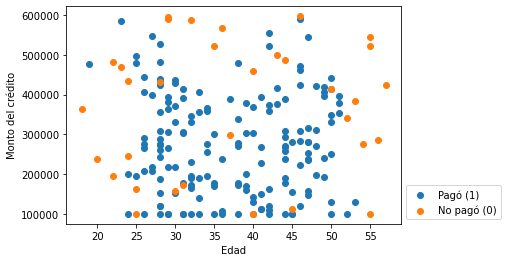

In [216]:
plt.scatter(df_clientes_cumplieron["edad"], df_clientes_cumplieron["credito"],
            label="Pagó (1)")

plt.scatter(df_clientes_morosos["edad"], df_clientes_morosos["credito"],
            label="No pagó (0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [265]:
data = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

In [266]:
#escalado de datos (de 0 a 1) para evitar sesgo 
escalador = preprocessing.MinMaxScaler()
data = escalador.fit_transform(data)
data

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

In [242]:
#creaccion del modelo 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, clase)

KNeighborsClassifier(n_neighbors=3)

In [233]:
#solicitante = {'edad': [53],
#              'credito': [350000]}
#solicitante = pd.DataFrame(solicitante)
#Escalar los datos del nuevo solicitante
#solicitante = escalador.fit_transform(solicitante)

In [258]:
edad = 53
monto = 350000
#Escalar los datos del solicitante
solicitante = escalador.transform([[edad, monto]])

In [259]:
#obtener clase y probabilidades
print("Clase:", knn.predict(solicitante))
print("Probabilidades por clase",
      knn.predict_proba(solicitante))

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


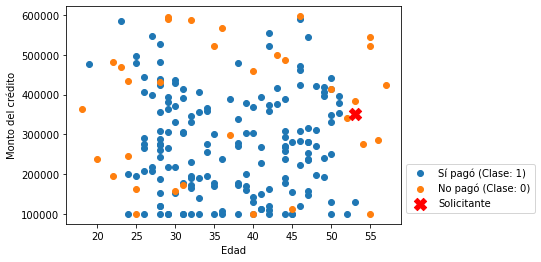

In [264]:
plt.scatter(df_clientes_cumplieron["edad"], df_clientes_cumplieron["credito"],
            label="Sí pagó (Clase: 1)")
plt.scatter(df_clientes_morosos["edad"], df_clientes_morosos["credito"],
         label="No pagó (Clase: 0)")
#plt.scatter(solicitante["edad"], solicitante["credito"], marker="X", s=150, color="red", label="Solicitante")
plt.scatter(edad, monto, marker="X", color="red", label="Solicitante", s=150) 
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()